In [1]:

! cd ../data/; FILELIST="200430 200429 200428 200427 200426 200425 200424 200423 200422" ; for fecha in `echo $FILELIST`  ; do  FILE=${fecha}_cam_covid19.pdf ; echo $FILE:::::  ;  [ ! -f ../data/${FILE} ] && wget https://www.comunidad.madrid/sites/default/files/doc/sanidad/$FILE ; ls -altr $FILE ; done 

! ls -altr ../data/*cam*
! pwd 

200430_cam_covid19.pdf:::::
--2020-04-30 14:59:32--  https://www.comunidad.madrid/sites/default/files/doc/sanidad/200430_cam_covid19.pdf
Resolving www.comunidad.madrid (www.comunidad.madrid)... 13.224.118.101, 13.224.118.87, 13.224.118.90, ...
Connecting to www.comunidad.madrid (www.comunidad.madrid)|13.224.118.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 554446 (541K) [application/pdf]
Saving to: ‘200430_cam_covid19.pdf’

100%[======================================>] 554.446     --.-K/s   in 0,02s   

2020-04-30 14:59:33 (21,7 MB/s) - ‘200430_cam_covid19.pdf’ saved [554446/554446]

-rw-r--r-- 1 root root 554446 abr 30 08:36 200430_cam_covid19.pdf
200429_cam_covid19.pdf:::::
-rw-r--r-- 1 root root 557572 abr 29 09:53 200429_cam_covid19.pdf
200428_cam_covid19.pdf:::::
-rw-r--r-- 1 root root 555864 abr 28 09:10 200428_cam_covid19.pdf
200427_cam_covid19.pdf:::::
-rw-r--r-- 1 root root 556578 abr 27 09:03 200427_cam_covid19.pdf
200426_cam_covid19.pdf:::::
-

In [41]:

df_pdf =  read_pdf('../data/200426_cam_covid19.pdf',pages='1', output_format  ='json')




[{'extraction_method': 'stream',
  'top': 129.0,
  'left': 70.0,
  'width': 658.0,
  'height': 75.0,
  'right': 728.0,
  'bottom': 204.0,
  'data': [[{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 135.98,
     'left': 355.01,
     'width': 134.84999084472656,
     'height': 6.0,
     'text': 'DATOS EPIDEMIOLÓGICOS'},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}],
   [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''}],
   [{'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 0.0, 'left': 0.0, 'width': 0.0, 'height': 0.0, 'text': ''},
    {'top': 151.1,
     'left': 511.99,
     'width': 46.6900024414062

In [72]:
from tabula import read_pdf
import os 
import pandas as pd
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-1.8.0-openjdk-1.8.0.141-1.b16.el7_3.x86_64/jre"

def get_daily_data(fecha):
    col2str = {'dtype': str}
    kwargs = {'output_format': 'dataframe',
              'pandas_options': col2str,
              'stream': False}
    df_pdf =  read_pdf('../data/'+fecha+'_cam_covid19.pdf',pages='1',multiple_tables = True,**kwargs)

    
    df = df_pdf[0]
    #print(fecha, df.index, df.columns)
    df = df[df['Unnamed: 0'].notna()]
    df = df[(df['Unnamed: 0']=='HOSPITALES') | (df['Unnamed: 0'] == 'DOMICILIOS') | (df['Unnamed: 0'] == 'CENTROS SOCIOSANITARIOS') | (df['Unnamed: 0'] == 'OTROS LUGARES') | (df['Unnamed: 0'] == 'FALLECIDOS TOTALES')]
    df = df[['Unnamed: 0','Unnamed: 2']]
    df['Unnamed: 2'] = df['Unnamed: 2'].astype(str).str.replace(r".", '')
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]

    df['Fecha'] =  pd.to_datetime(fecha, format='%y%m%d')
    #del df['Unnamed: 0']
    #df = df.reset_index(drop=True)
    df = df.rename_axis(None)

    df.set_index('Fecha', inplace=True, drop=True)
    df.index
    df.dropna()
    #df = df.T
    return df

def get_all_data( ): 
    ARRAY_FECHAS = ["200430","200428","200427","200426","200425","200424","200423"]
    #ARRAY_FECHAS = ["200422"]

    list_df = []
    for fecha in ARRAY_FECHAS:
        df = get_daily_data(fecha)
        list_df.append(df)

    df = pd.concat(list_df)
    df = df.astype(int)
    df = df.sort_values(by=['Fecha'], ascending=True)

    df['HOSPITALES hoy'] = df['HOSPITALES'] - df['HOSPITALES'].shift(1)
    df['CENTROS SOCIOSANITARIOS hoy'] = df['CENTROS SOCIOSANITARIOS'] - df['CENTROS SOCIOSANITARIOS'].shift(1)
    df['FALLECIDOS TOTALES hoy'] = df['FALLECIDOS TOTALES'] - df['FALLECIDOS TOTALES'].shift(1)

    df = df.sort_values(by=['Fecha'], ascending=False)

    return df 

In [73]:
total =  get_all_data()

total

Unnamed: 0,HOSPITALES,DOMICILIOS,CENTROS SOCIOSANITARIOS,OTROS LUGARES,FALLECIDOS TOTALES,HOSPITALES hoy,CENTROS SOCIOSANITARIOS hoy,FALLECIDOS TOTALES hoy
Fecha,,,,,,,,
2020-04-30,8136,823,4338,24,13321,178.0,43.0,241.0
2020-04-28,7958,806,4295,21,13080,77.0,22.0,104.0
2020-04-27,7881,801,4273,21,12976,81.0,37.0,121.0
2020-04-26,7800,798,4236,21,12855,167.0,66.0,243.0
2020-04-25,7633,788,4170,21,12612,245.0,102.0,360.0
2020-04-24,7388,775,4068,21,12252,117.0,72.0,196.0
2020-04-23,7271,769,3996,20,12056,NaN,NaN,NaN


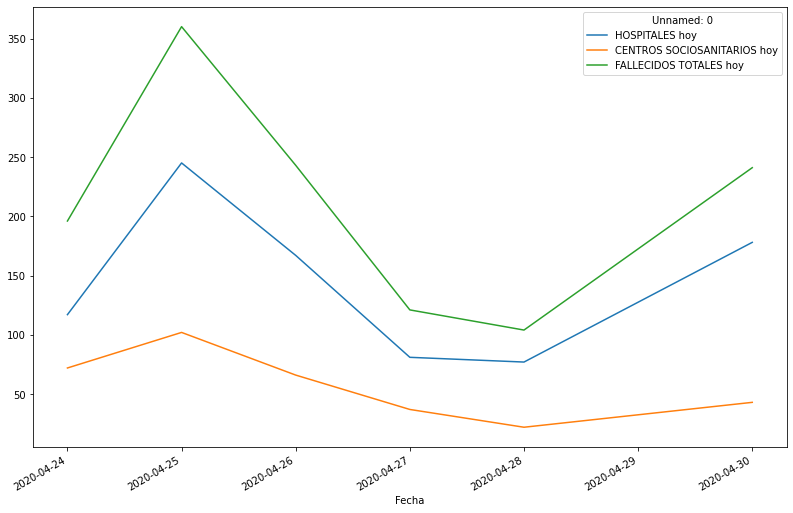

In [78]:
import pandas as pd
import io
import matplotlib.dates as mdates
from matplotlib import pyplot as plt



chart_df=total[['HOSPITALES hoy','CENTROS SOCIOSANITARIOS hoy','FALLECIDOS TOTALES hoy']]
chart_df.plot(legend=True,figsize=(13.5,9))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.show()



In [79]:
from IPython.display import display, HTML
HTML("<h2>Muertes medias diarias desde que la comunidad de Madrid publica datos</h2>")


In [80]:
# Calculamos los incrementos medios, desde que tenemos fechas
medias_datos = pd.DataFrame((df.head(1).max(axis=0) - df.tail(1).max(axis=0) ) / df.shape[0] ).T[['HOSPITALES','DOMICILIOS','CENTROS SOCIOSANITARIOS','OTROS LUGARES','FALLECIDOS TOTALES']]
medias_datos

Unnamed: 0,HOSPITALES,DOMICILIOS,CENTROS SOCIOSANITARIOS,OTROS LUGARES,FALLECIDOS TOTALES
0,123.571429,7.714286,48.857143,0.571429,180.714286


In [81]:
from IPython.display import display, HTML
HTML("<h2>Muertes medias diarias desde el principio de la crisis</h2>")


In [82]:
from datetime import date

inicio_crisis = pd.Timestamp('2020-03-09 00:00:00')
dia_mas_reciente = df.index[0]
dias_transcurridos_inicio_crisis = dia_mas_reciente - inicio_crisis

medias_inicio_crisis = pd.DataFrame((df.head(1).max(axis=0)) / dias_transcurridos_inicio_crisis.days ).T[['HOSPITALES','DOMICILIOS','CENTROS SOCIOSANITARIOS','OTROS LUGARES','FALLECIDOS TOTALES']]
medias_inicio_crisis
                                    

Unnamed: 0,HOSPITALES,DOMICILIOS,CENTROS SOCIOSANITARIOS,OTROS LUGARES,FALLECIDOS TOTALES
0,156.461538,15.826923,83.423077,0.461538,256.173077
